In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split,StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
import os
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor

In [2]:
HN=pd.read_csv("HN.csv")

In [3]:
HN.head()

,Chuyen muc,Quan/huyen,Xa/Phuong,Duong/khu vuc,Gia,Dien tich,Huong,So Tang,So phong,Nha ve sinh,Giay to phap,Thang,Nam
0,Nhà,Quận Thanh Xuân,Phường Khương Đình,Đường Vũ Tông Phan,0.0068,35.0,NaN,5.0,4.0,5.0,Đã có sổ,5,2021
1,Nhà,Huyện Chương Mỹ,Xã Trung Hòa,Đường Làng,0.5000,220.0,NaN,NaN,2.0,1.0,Đã có sổ,5,2021
2,Nhà,Quận Thanh Xuân,Phường Khương Đình,Đường Bùi Xương Trạch,2.7800,32.0,NaN,4.0,4.0,4.0,Đã có sổ,5,2021
3,Nhà,Quận Nam Từ Liêm,Phường Mễ Trì,Đường Đỗ Đức Dục,34.0000,300.0,NaN,NaN,1.0,NaN,NaN,5,2021
4,Nhà,Quận Thanh Xuân,Phường Kim Giang,Đường Vũ Tông Phan,6.0000,45.0,NaN,5.0,5.0,5.0,Đã có sổ,5,2021


In [4]:
# for col in HN:
# #     print(HN[col].unique())
#     print(len(HN[col].unique()))

In [5]:
HN = HN.dropna(axis=0, subset=['Quan/huyen', 'Xa/Phuong'])
HN['Huong'] = HN['Huong'].fillna("None")
HN['Giay to phap'] = HN['Giay to phap'].fillna("None")
HN['So Tang'].fillna((HN['So Tang'].mean()), inplace=True)
HN['So phong'].fillna((HN['So phong'].mean()), inplace=True)
HN['Nha ve sinh'].fillna((HN['Nha ve sinh'].mean()), inplace=True)
dictt = []

HN["Chuyen muc"] = HN["Chuyen muc"].astype('category')
dictt.append(dict(enumerate(HN["Chuyen muc"].cat.categories)))
HN["Chuyen muc"] = HN["Chuyen muc"].cat.codes

HN["Quan/huyen"] = HN["Quan/huyen"].astype('category')
dictt.append(dict(enumerate(HN["Quan/huyen"].cat.categories)))
HN["Quan/huyen"] = HN["Quan/huyen"].cat.codes

HN["Xa/Phuong"] = HN["Xa/Phuong"].astype('category')
dictt.append(dict(enumerate(HN["Xa/Phuong"].cat.categories)))
HN["Xa/Phuong"] = HN["Xa/Phuong"].cat.codes

HN["Duong/khu vuc"] = HN["Duong/khu vuc"].astype('category')
dictt.append(dict(enumerate(HN["Duong/khu vuc"].cat.categories)))
HN["Duong/khu vuc"] = HN["Duong/khu vuc"].cat.codes

HN["Huong"] = HN["Huong"].astype('category')
dictt.append(dict(enumerate(HN["Huong"].cat.categories)))
HN["Huong"] = HN["Huong"].cat.codes

HN["Giay to phap"] = HN["Giay to phap"].astype('category')
dictt.append(dict(enumerate(HN["Giay to phap"].cat.categories)))
HN["Giay to phap"] = HN["Giay to phap"].cat.codes

HN["Thang"] = HN["Thang"].astype('category')
dictt.append(dict(enumerate(HN["Thang"].cat.categories)))
HN["Thang"] = HN["Thang"].cat.codes

HN["Nam"] = HN["Nam"].astype('category')
dictt.append(dict(enumerate(HN["Nam"].cat.categories)))
HN["Nam"] = HN["Nam"].cat.codes


In [6]:
# HN.dtypes

In [7]:
# for col in HN:
#     print(HN[col].isna().sum())

In [8]:
HN

,Chuyen muc,Quan/huyen,Xa/Phuong,Duong/khu vuc,Gia,Dien tich,Huong,So Tang,So phong,Nha ve sinh,Giay to phap,Thang,Nam
0,1,23,42,2555,0.0068,35.0,2,5.00000,4.0,5.000000,5,4,2
1,1,1,247,994,0.5000,220.0,2,4.45016,2.0,1.000000,5,4,2
2,1,23,42,280,2.7800,32.0,2,4.00000,4.0,4.000000,5,4,2
3,1,22,59,3059,34.0000,300.0,2,4.45016,1.0,3.180309,2,4,2
4,1,23,43,2555,6.0000,45.0,2,5.00000,5.0,5.000000,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,1,20,68,2345,2.3000,35.0,2,4.45016,4.0,3.180309,2,10,0
41343,1,20,68,2345,2.3000,35.0,2,4.45016,4.0,3.180309,2,10,0
41344,0,22,61,1054,2.7000,96.0,2,4.45016,3.0,3.180309,2,10,0
41345,1,15,78,748,6.2000,60.0,8,5.00000,6.0,4.000000,6,10,0


In [9]:
avg_price_dict = {
    0: 9.1,
    1: 15.4,
    2: 50,
    3: 53.1,
    4: 23.1,
    5: 14.9,
    6: 13.5,
    7: 15.8,
    8: 27.3,
    9: 71.4,
    10: 26.6,
    11: 16.9,
    12: 28.7,
    13: 40.9,
    14: 176,
    15: 81.7,
    16: 168,
    17: 166,
    18: 517,
    19: 86.7,
    20: 83.3,
    21: 82.3,
    22: 80.6,
    23: 127,
    24: 167,
    25: 174,
    26: 9
}

In [10]:
density_pop = { 0: 687,
              1: 1421,
              2: 2451,
              3: 3096,
              4: 1689,
              5: 1551,
              6: 1286,
              7: 1127,
              8: 1704,
              9: 4343,
              10: 1953,
              11: 1155,
              12: 2237,
              13: 2186,
              14: 24093,
              15: 7394,
              16: 23745,
              17: 29589,
              18: 25637,
              19: 12558,
              20: 8015,
              21: 5392,
              22: 8209,
              23: 32291,
              24: 6580,
              25: 37347,
              26: 1242
            }

In [11]:
rural_pop = { 0: 274998,
              1: 300897,
              2: 241243,
              3: 256761,
              4: 203158,
              5: 175304,
              6: 179921,
              7: 338583,
              8: 203960,
              9: 48722,
              10: 248524,
              11: 210002,
              12: 163896,
              13: 380475,
              14: 0,
              15: 0,
              16: 0,
              17: 0,
              18: 0,
              19: 0,
              20: 0,
              21: 0,
              22: 0,
              23: 0,
              24: 0,
              25: 0,
              26: 68900
            }

In [12]:
urban_pop= {  0: 15582,
              1: 36429,
              2: 44859,
              3: 6217,
              4: 37397,
              5: 8720,
              6: 14491,
              7: 4849,
              8: 7069,
              9: 16762,
              10: 6178,
              11: 6552,
              12: 10605,
              13: 25274,
              14: 221893,
              15: 335110,
              16: 292536,
              17: 303586,
              18: 135618,
              19: 506347,
              20: 397854,
              21: 322549,
              22: 264246,
              23: 293524,
              24: 160495,
              25: 371606,
              26: 76956
           }

In [108]:
dictt

[{0: 'Căn hộ, Chung cư', 1: 'Nhà'},
 {0: 'Huyện Ba Vì',
  1: 'Huyện Chương Mỹ',
  2: 'Huyện Gia Lâm',
  3: 'Huyện Hoài Đức',
  4: 'Huyện Mê Linh',
  5: 'Huyện Phúc Thọ',
  6: 'Huyện Quốc Oai',
  7: 'Huyện Sóc Sơn',
  8: 'Huyện Thanh Oai',
  9: 'Huyện Thanh Trì',
  10: 'Huyện Thường Tín',
  11: 'Huyện Thạch Thất',
  12: 'Huyện Đan Phượng',
  13: 'Huyện Đông Anh',
  14: 'Quận Ba Đình',
  15: 'Quận Bắc Từ Liêm',
  16: 'Quận Cầu Giấy',
  17: 'Quận Hai Bà Trưng',
  18: 'Quận Hoàn Kiếm',
  19: 'Quận Hoàng Mai',
  20: 'Quận Hà Đông',
  21: 'Quận Long Biên',
  22: 'Quận Nam Từ Liêm',
  23: 'Quận Thanh Xuân',
  24: 'Quận Tây Hồ',
  25: 'Quận Đống Đa',
  26: 'Thị xã Sơn Tây'},
 {0: 'Phường Biên Giang',
  1: 'Phường Bách Khoa',
  2: 'Phường Bùi Thị Xuân',
  3: 'Phường Bưởi',
  4: 'Phường Bạch Mai',
  5: 'Phường Bạch Đằng',
  6: 'Phường Bồ Đề',
  7: 'Phường Chương Dương',
  8: 'Phường Cát Linh',
  9: 'Phường Cầu Diễn',
  10: 'Phường Cầu Dền',
  11: 'Phường Cống Vị',
  12: 'Phường Cổ Nhuế 1',
  13:

In [13]:
for i, row in HN.iterrows():
    if row['Gia'] / row['Dien tich'] < 0.001 or row['Gia']/row['Dien tich'] > 1000:
        HN.drop(i, inplace=True)
    else:
        row['Gia/m2'] = row['Gia'] / row['Dien tich']
        HN.at[i,'Gia/m2'] = row['Gia/m2']

In [14]:
HN['Gia Trung Binh'] = HN['Quan/huyen'].map(avg_price_dict)
HN['Mat Do Dan So'] = HN['Quan/huyen'].map(density_pop)
HN['Dan So Nong Thon'] = HN['Quan/huyen'].map(rural_pop)
HN['Dan So Thanh Thi'] = HN['Quan/huyen'].map(urban_pop)

In [15]:
HN

,Chuyen muc,Quan/huyen,Xa/Phuong,Duong/khu vuc,Gia,Dien tich,Huong,So Tang,So phong,Nha ve sinh,Giay to phap,Thang,Nam,Gia/m2,Gia Trung Binh,Mat Do Dan So,Dan So Nong Thon,Dan So Thanh Thi
1,1,1,247,994,0.50,220.0,2,4.45016,2.0,1.000000,5,4,2,0.002273,15.4,1421,300897,36429
2,1,23,42,280,2.78,32.0,2,4.00000,4.0,4.000000,5,4,2,0.086875,127.0,32291,0,293524
3,1,22,59,3059,34.00,300.0,2,4.45016,1.0,3.180309,2,4,2,0.113333,80.6,8209,0,264246
4,1,23,43,2555,6.00,45.0,2,5.00000,5.0,5.000000,5,4,2,0.133333,127.0,32291,0,293524
5,1,19,25,1368,1.95,30.0,2,4.45016,3.0,3.000000,5,4,2,0.065000,86.7,12558,0,506347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,1,20,68,2345,2.30,35.0,2,4.45016,4.0,3.180309,2,10,0,0.065714,83.3,8015,0,397854
41343,1,20,68,2345,2.30,35.0,2,4.45016,4.0,3.180309,2,10,0,0.065714,83.3,8015,0,397854
41344,0,22,61,1054,2.70,96.0,2,4.45016,3.0,3.180309,2,10,0,0.028125,80.6,8209,0,264246
41345,1,15,78,748,6.20,60.0,8,5.00000,6.0,4.000000,6,10,0,0.103333,81.7,7394,0,335110


In [16]:
import scipy.stats as stats
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [17]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

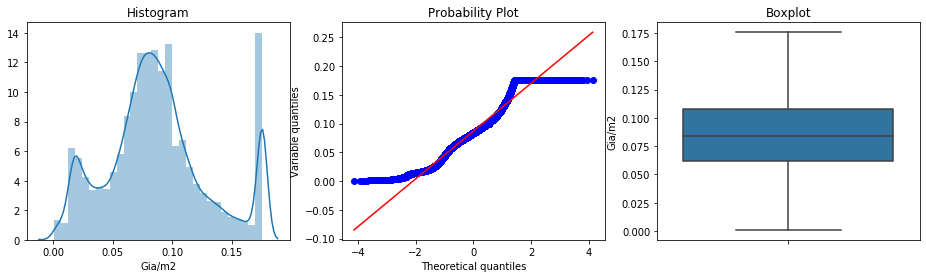

In [18]:
ap_upper_limit, ap_lower_limit = find_skewed_boundaries(HN, 'Gia/m2', 1.5)
ap_upper_limit, ap_lower_limit
HN['Gia/m2']= np.where(HN['Gia/m2'] > ap_upper_limit, ap_upper_limit,
                       np.where(HN['Gia/m2'] < ap_lower_limit, ap_lower_limit, HN['Gia/m2']))
diagnostic_plots(HN, 'Gia/m2')

In [19]:
# ap_upper_limit, ap_lower_limit = find_skewed_boundaries(HN, 'Dien tich', 1.5)
# ap_upper_limit, ap_lower_limit
# HN['Dien tich'] = np.where(HN['Dien tich'] > ap_upper_limit, ap_upper_limit,
#                        np.where(HN['Dien tich'] < ap_lower_limit, ap_lower_limit, HN['Dien tich']))
# diagnostic_plots(HN, 'Dien tich')

In [20]:
from sklearn.model_selection import train_test_split

ratio = 0.9
# HN.drop(HN.columns[-5], axis =  1, inplace = True)

train_df, test_df = train_test_split(HN, test_size=(1-ratio))
# train_df=HN[:int(HN.shape[0]*ratio)]
# test_df=HN[int(HN.shape[0]*ratio):]
X=train_df.drop(['Gia'],axis=1)
y=train_df['Gia'] 
X_main_test=test_df.drop(['Gia'],axis=1)

In [21]:
test_size = len(test_df)/(len(test_df)+len(train_df))
test_size = int(test_size*100)/100

In [22]:
from lightgbm import LGBMClassifier
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import statistics

In [23]:
def modelfit(alg, dtrain, target, only_predict = False):
    #Fit the algorithm on the data
    time_start = time.perf_counter() #start counting the time
    if not only_predict:
        alg.fit(dtrain, target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    cv_score = cross_val_score(alg, dtrain,target, cv=kfolds, scoring='neg_mean_absolute_error')
    cv_score = np.sqrt(-cv_score)
    
    cv_score_med = cross_val_score(alg, dtrain,target, cv=kfolds, scoring='neg_median_absolute_error')
    cv_score_med = np.sqrt(-cv_score_med)
    
    time_end = time.perf_counter()
    
    total_time = time_end-time_start
    #Print model report:
    print("\nModel Report")
    print("RMSE :  {:.4f}".format(np.sqrt(mean_squared_error(target, dtrain_predictions))))
    print("MSE :  {:.4f}".format(mean_squared_error(target, dtrain_predictions)))
    print("MAE :  {:.4f}".format(mean_absolute_error(target, dtrain_predictions)))
    print("MAE_median :  {:.4f}".format(median_absolute_error(target, dtrain_predictions)))
    print("RMAE :  {:.4f}".format(np.sqrt(mean_absolute_error(target, dtrain_predictions))))
    print("RMAE_median :  {:.4f}".format(np.sqrt(median_absolute_error(target, dtrain_predictions))))
    print("R2 :  {:.4f}".format(r2_score(target, dtrain_predictions)))
    print("CV Score : Mean -  %.4f | Std -  %.4f | Min -  %.4f | Max - %.4f" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print("Amount of time training the model and CV: %4.3f seconds" % (total_time))

In [24]:
from sklearn.model_selection import GridSearchCV
#XGBoost hyper-parameter tuning
def LGBMhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [5, 10, 20, 31, 40],
        'min_child_samples': [100, 300, 500], 
        'min_child_weight': [1e-2, 1e-1],
        'n_estimators' : [50, 100, 200, 500, 1000]
    }

    lgbm_model = lgb.LGBMRegressor()

    gsearch = GridSearchCV(estimator = lgbm_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [25]:
# Plot feature importance
def plot_feature_importance(model, df):
    feature_importance = model.feature_importances_[:30]
    # make importances relative to max importance
    plt.figure(figsize=(20, 20)) #figure size
    feature_importance = 100.0 * (feature_importance / feature_importance.max()) #making it a percentage relative to the max value
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df.columns[sorted_idx], fontsize=15) #used train_drop here to show the name of each feature instead of our train_prepared 
    plt.xlabel('Relative Importance', fontsize=20)
    plt.ylabel('Features', fontsize=20)
    plt.title('Variable Importance', fontsize=30)

In [26]:
import lightgbm as lgb
# {'learning_rate': 0.01,
#  'min_child_samples': 100,
#  'min_child_weight': 0.01,
#  'n_estimators': 500,
#  'num_leaves': 40}
lgb_model = lgb.LGBMRegressor(num_leaves= 200, learning_rate= 0.01, min_child_weight= 0.01,min_child_samples=100, n_estimators= 500)
modelfit(lgb_model, X, y)


Model Report
RMSE :  9.5869
MSE :  91.9090
MAE :  0.8544
MAE_median :  0.0204
RMAE :  0.9243
RMAE_median :  0.1429
R2 :  0.4413
CV Score : Mean -  0.9629 | Std -  0.0696 | Min -  0.8680 | Max - 1.0722
Amount of time training the model and CV: 59.107 seconds


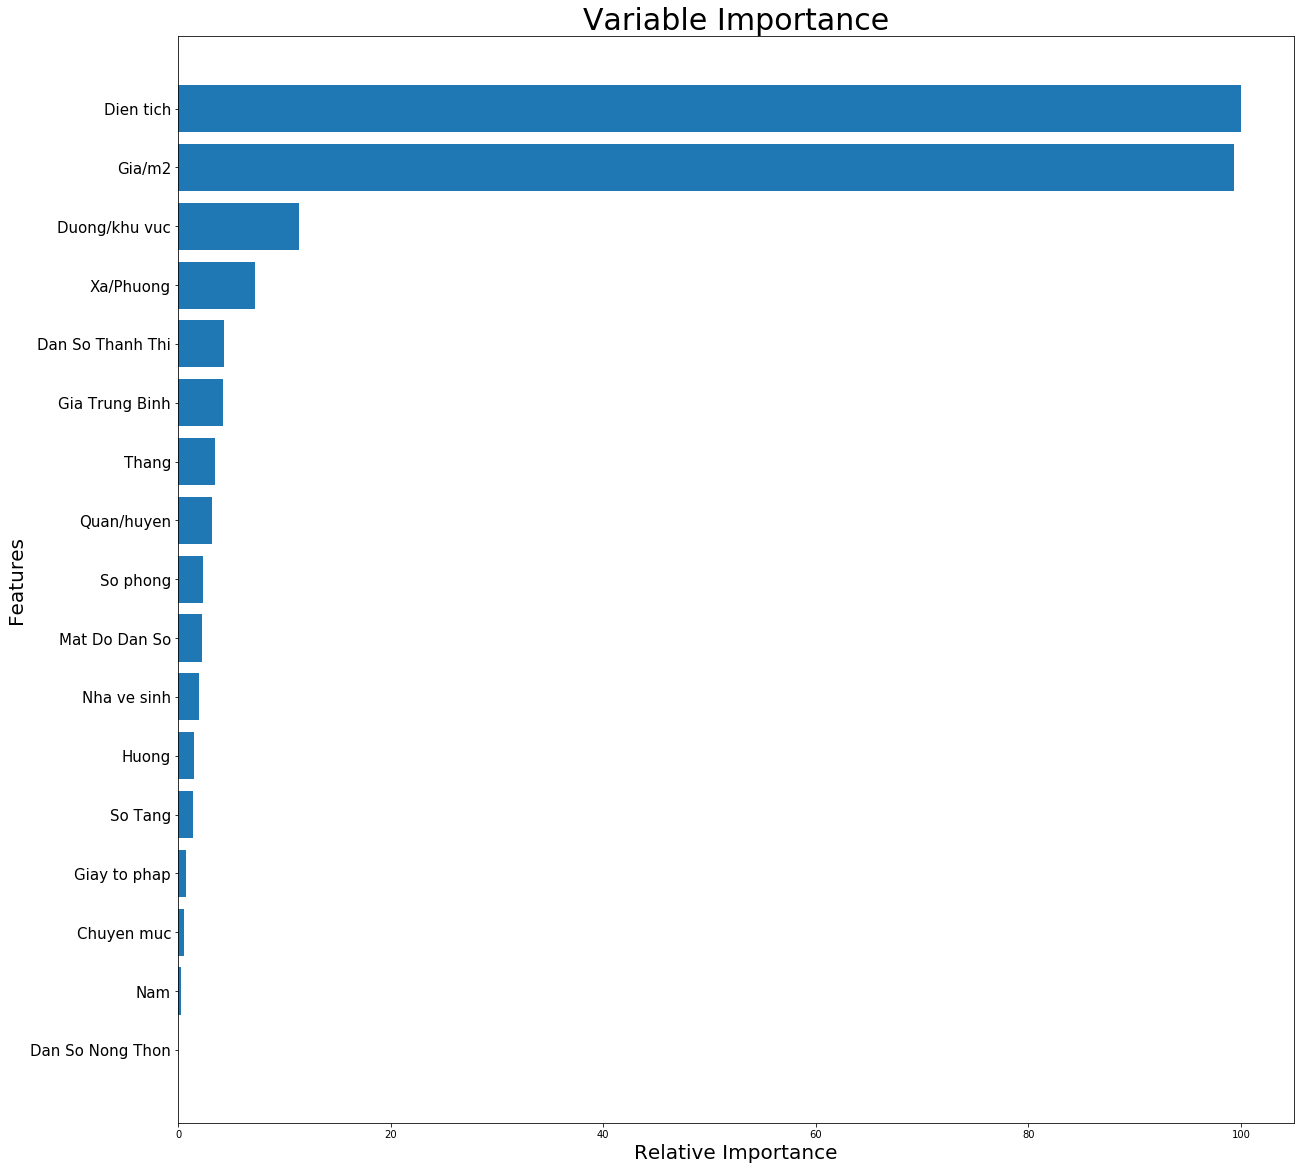

In [39]:
plot_feature_importance(lgb_model, X)

In [27]:
# {'colsample_bytree': 1,
#  'learning_rate': 0.05,
#  'max_depth': 10,
#  'n_estimators': 100}
        
my_XGB_model = XGBRegressor(colsample_bytree= 1, learning_rate= 0.05, max_depth= 10, n_estimators= 100)
# my_XGB_model.fit(X, y, verbose=False)
modelfit(my_XGB_model, X, y)


Model Report
RMSE :  3.9686
MSE :  15.7497
MAE :  0.4386
MAE_median :  0.0200
RMAE :  0.6623
RMAE_median :  0.1415
R2 :  0.9043
CV Score : Mean -  0.8998 | Std -  0.1128 | Min -  0.7511 | Max - 1.1551
Amount of time training the model and CV: 34.872 seconds


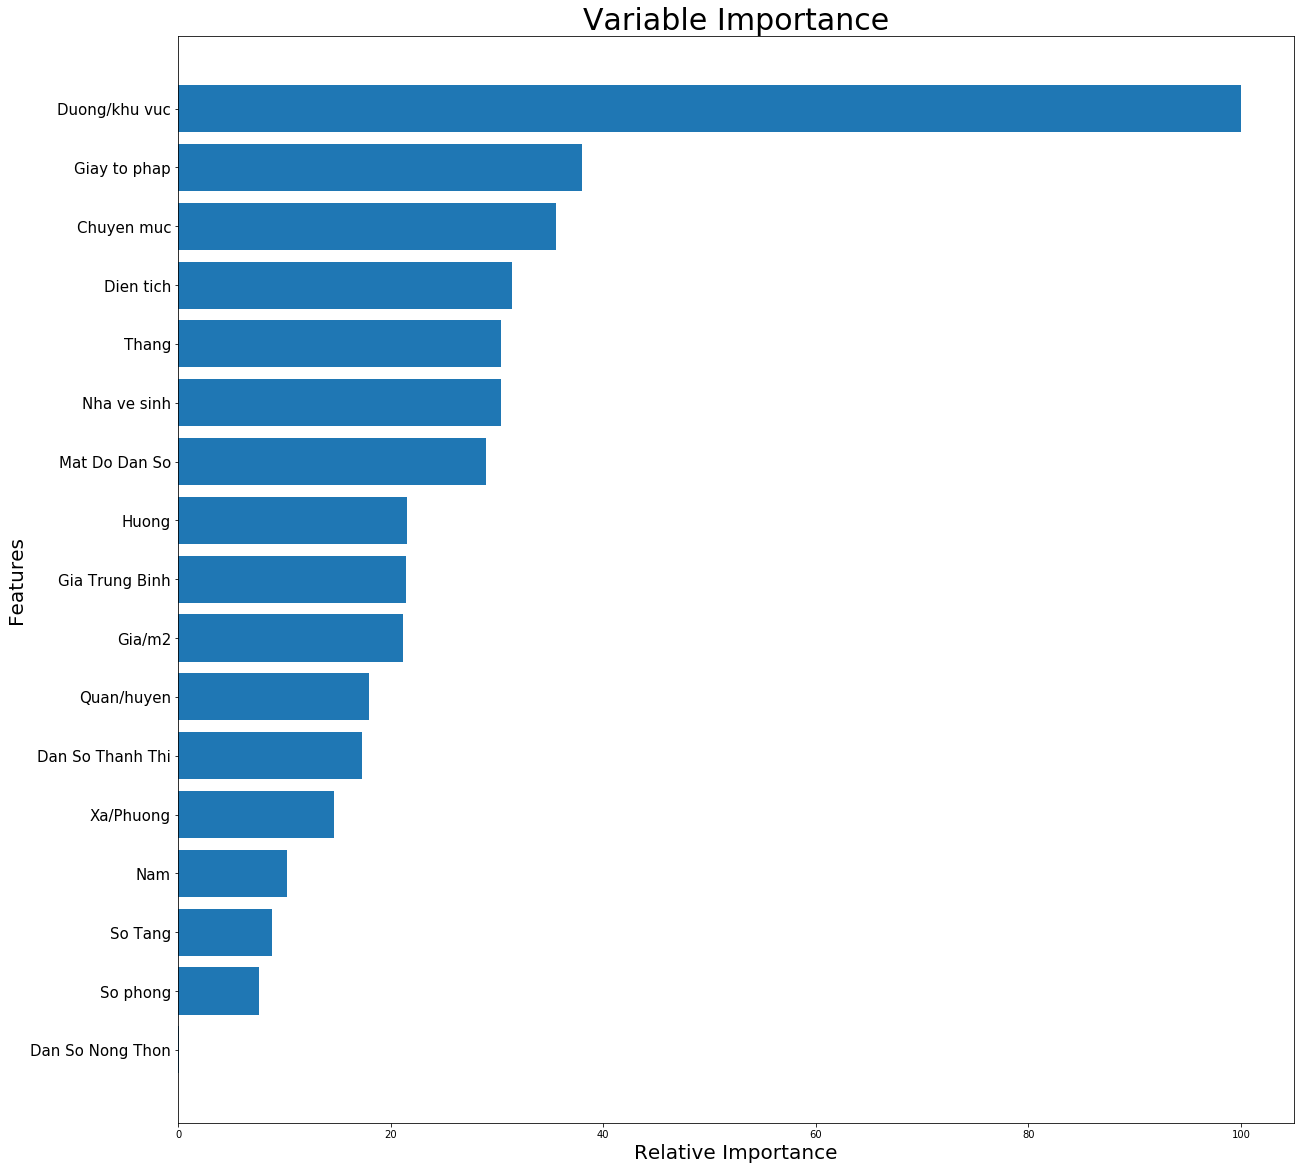

In [41]:
plot_feature_importance(my_XGB_model, X)

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
modelfit(regr, X, y)


Model Report
RMSE :  11.1903
MSE :  125.2236
MAE :  2.6282
MAE_median :  1.5563
RMAE :  1.6212
RMAE_median :  1.2475
R2 :  0.2541
CV Score : Mean -  1.6230 | Std -  0.0390 | Min -  1.5772 | Max - 1.6994
Amount of time training the model and CV: 0.248 seconds


In [57]:
xg_boost_ratio = 0.5
final_predictions_xg = my_XGB_model.predict(X_main_test)
final_predictions_lg = lgb_model.predict(X_main_test)
dif = final_predictions_lg*(1-xg_boost_ratio) + final_predictions_xg*xg_boost_ratio - test_df['Gia']
print(statistics.median(np.abs(dif)))

0.014084496804046331


In [ ]:
print(statistics.mean(np.abs(dif)))

In [ ]:
dif

In [29]:
from sklearn.model_selection import GridSearchCV
#XGBoost hyper-parameter tuning
def XGhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
        'colsample_bytree': [0.3, 0.5, 0.7, 1],
        'n_estimators' : [50, 100, 200, 500]
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [32]:
#Run only in the first run of the kernel.
# XGhyperParameterTuning(X, y)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed: 39.4min finished


{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 10,
 'n_estimators': 100}

In [37]:
# LGBMhyperParameterTuning(X, y)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:  5.7min finished


{'learning_rate': 0.01,
 'min_child_samples': 100,
 'min_child_weight': 0.01,
 'n_estimators': 500,
 'num_leaves': 40}

In [29]:
import statsmodels.api as sm
X_copy = X.copy()
X_copy.drop(X_copy.columns[-5], axis =  1, inplace = True)
ols = sm.OLS(y, X_copy)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Gia   R-squared (uncentered):                   0.280
Model:                            OLS   Adj. R-squared (uncentered):              0.280
Method:                 Least Squares   F-statistic:                              891.0
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:15:31   Log-Likelihood:                     -1.4255e+05
No. Observations:               36613   AIC:                                  2.851e+05
Df Residuals:                   36597   BIC:                                  2.853e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Chuyen muc           3.3089      0.230     14.410      0.000       2.859       3.759
Quan/huyen          -0.1876      0.017    -11.109      0.000      -0.221      -0.154
Xa/Phuong           -0.0087      0.001     -6.941      0.000      -0.011      -0.006
Duong/khu vuc     6.314e-05   7.86e-05      0.803      0.422    -9.1e-05       0.000
Dien tich            0.1179      0.002     67.812      0.000       0.115       0.121
Huong               -0.1766      0.041     -4.270      0.000      -0.258      -0.096
So Tang             -0.1135      0.038     -2.960      0.003      -0.189      -0.038
So phong             0.5127      0.055      9.239      0.000       0.404       0.621
Nha ve sinh          0.0009      0.082      0.011      0.991      -0.160       0.162
Giay to phap        -0.1129      0.039     -2.885      0.004      -0.190      -0.036
Thang               -0.0959      0.020     -4.746      0.000      -0.135      -0.056
Nam                 -0.4934      0.147     -3.349      0.001      -0.782      -0.205
Gia Trung Binh       0.0301      0.002     19.180      0.000       0.027       0.033
Mat Do Dan So    -2.438e-05   7.47e-06     -3.264      0.001    -3.9e-05   -9.74e-06
Dan So Nong Thon  -2.13e-05   2.08e-06    -10.263      0.000   -2.54e-05   -1.72e-05
Dan So Thanh Thi -5.389e-06   6.79e-07     -7.941      0.000   -6.72e-06   -4.06e-06
==============================================================================
Omnibus:                   102210.972   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       7500358864.896
Skew:                          36.001   Prob(JB):                         0.00
Kurtosis:                    2219.154   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
HN_copy

,Chuyen muc,Quan/huyen,Xa/Phuong,Duong/khu vuc,Dien tich,Huong,So Tang,So phong,Nha ve sinh,Giay to phap,...,Nam,Gia/m2,Gia Trung Binh,Mat Do Dan So,Dan So Nong Thon,Dan So Thanh Thi,Thang2,Nam2,Ngay2,date
1,1,1,247,994,220.0,2,4.45016,2.0,1.000000,5,...,2,0.002273,15.4,1421,300897,36429,5.0,2021.0,1,2021-05-01
2,1,23,42,280,32.0,2,4.00000,4.0,4.000000,5,...,2,0.086875,127.0,32291,0,293524,5.0,2021.0,1,2021-05-01
3,1,22,59,3059,300.0,2,4.45016,1.0,3.180309,2,...,2,0.113333,80.6,8209,0,264246,5.0,2021.0,1,2021-05-01
4,1,23,43,2555,45.0,2,5.00000,5.0,5.000000,5,...,2,0.133333,127.0,32291,0,293524,5.0,2021.0,1,2021-05-01
5,1,19,25,1368,30.0,2,4.45016,3.0,3.000000,5,...,2,0.065000,86.7,12558,0,506347,5.0,2021.0,1,2021-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,1,20,68,2345,35.0,2,4.45016,4.0,3.180309,2,...,0,0.065714,83.3,8015,0,397854,11.0,2019.0,1,2019-11-01
41343,1,20,68,2345,35.0,2,4.45016,4.0,3.180309,2,...,0,0.065714,83.3,8015,0,397854,11.0,2019.0,1,2019-11-01
41344,0,22,61,1054,96.0,2,4.45016,3.0,3.180309,2,...,0,0.028125,80.6,8209,0,264246,11.0,2019.0,1,2019-11-01
41345,1,15,78,748,60.0,8,5.00000,6.0,4.000000,6,...,0,0.103333,81.7,7394,0,335110,11.0,2019.0,1,2019-11-01


In [29]:
# {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12},
# {0: 2019, 1: 2020, 2: 2021}]
# {0: 'Huyện Ba Vì',
#   1: 'Huyện Chương Mỹ',
#   2: 'Huyện Gia Lâm',
#   3: 'Huyện Hoài Đức',
#   4: 'Huyện Mê Linh',
#   5: 'Huyện Phúc Thọ',
#   6: 'Huyện Quốc Oai',
#   7: 'Huyện Sóc Sơn',
#   8: 'Huyện Thanh Oai',
#   9: 'Huyện Thanh Trì',
#   10: 'Huyện Thường Tín',
#   11: 'Huyện Thạch Thất',
#   12: 'Huyện Đan Phượng',
#   13: 'Huyện Đông Anh',
#   14: 'Quận Ba Đình',
#   15: 'Quận Bắc Từ Liêm',
#   16: 'Quận Cầu Giấy',
#   17: 'Quận Hai Bà Trưng',
#   18: 'Quận Hoàn Kiếm',
#   19: 'Quận Hoàng Mai',
#   20: 'Quận Hà Đông',
#   21: 'Quận Long Biên',
#   22: 'Quận Nam Từ Liêm',
#   23: 'Quận Thanh Xuân',
#   24: 'Quận Tây Hồ',
#   25: 'Quận Đống Đa',
#   26: 'Thị xã Sơn Tây'
xg_boost_ratio = 0.5
HN_copy = HN.copy()
HN_copy.drop(HN_copy.columns[4], axis =  1, inplace = True)
# HN_copy = HN_copy.loc[HN_copy['Quan/huyen'] == 13]
final_predictions_xg = my_XGB_model.predict(HN_copy)
final_predictions_lg = lgb_model.predict(HN_copy)
# final_predictions_li = regr.predict(HN_copy)
ensemble = final_predictions_lg*(1-xg_boost_ratio) + final_predictions_xg*xg_boost_ratio
target = HN["Gia"]

print("RMSE :  {:.4f}".format(np.sqrt(mean_squared_error(target, ensemble))))
print("MSE :  {:.4f}".format(mean_squared_error(target, ensemble)))
print("MAE :  {:.4f}".format(mean_absolute_error(target, ensemble)))
print("MAE_median :  {:.4f}".format(median_absolute_error(target, ensemble)))
print("RMAE :  {:.4f}".format(np.sqrt(mean_absolute_error(target, ensemble))))
print("RMAE_median :  {:.4f}".format(np.sqrt(median_absolute_error(target, ensemble))))
print("R2 :  {:.4f}".format(r2_score(target, ensemble)))

# print(statistics.median(np.abs(dif)))

RMSE :  6.7106
MSE :  45.0322
MAE :  0.6522
MAE_median :  0.0136
RMAE :  0.8076
RMAE_median :  0.1167
R2 :  0.7287


In [32]:
HN_copy

,Chuyen muc,Quan/huyen,Xa/Phuong,Duong/khu vuc,Dien tich,Huong,So Tang,So phong,Nha ve sinh,Giay to phap,Thang,Nam,Gia/m2,Gia Trung Binh,Mat Do Dan So,Dan So Nong Thon,Dan So Thanh Thi
1,1,1,247,994,220.0,2,4.45016,2.0,1.000000,5,4,2,0.002273,15.4,1421,300897,36429
2,1,23,42,280,32.0,2,4.00000,4.0,4.000000,5,4,2,0.086875,127.0,32291,0,293524
3,1,22,59,3059,300.0,2,4.45016,1.0,3.180309,2,4,2,0.113333,80.6,8209,0,264246
4,1,23,43,2555,45.0,2,5.00000,5.0,5.000000,5,4,2,0.133333,127.0,32291,0,293524
5,1,19,25,1368,30.0,2,4.45016,3.0,3.000000,5,4,2,0.065000,86.7,12558,0,506347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,1,20,68,2345,35.0,2,4.45016,4.0,3.180309,2,10,0,0.065714,83.3,8015,0,397854
41343,1,20,68,2345,35.0,2,4.45016,4.0,3.180309,2,10,0,0.065714,83.3,8015,0,397854
41344,0,22,61,1054,96.0,2,4.45016,3.0,3.180309,2,10,0,0.028125,80.6,8209,0,264246
41345,1,15,78,748,60.0,8,5.00000,6.0,4.000000,6,10,0,0.103333,81.7,7394,0,335110


In [86]:
HN_emsemble = pd.DataFrame()
HN_emsemble["Quan/Huyen"] = HN_copy["Quan/huyen"]
HN_emsemble["Gia"] = final_predictions_xg
a = HN_emsemble.groupby(['Quan/Huyen']).mean()
a.index = a.index.map(dictt[1])

In [87]:
HN_real = pd.DataFrame()
HN_real["Quan/Huyen"] = HN_copy["Quan/huyen"]
HN_real["Gia"] = HN["Gia"]
real = HN_real.groupby(['Quan/Huyen']).mean()
real.index = real.index.map(dictt[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

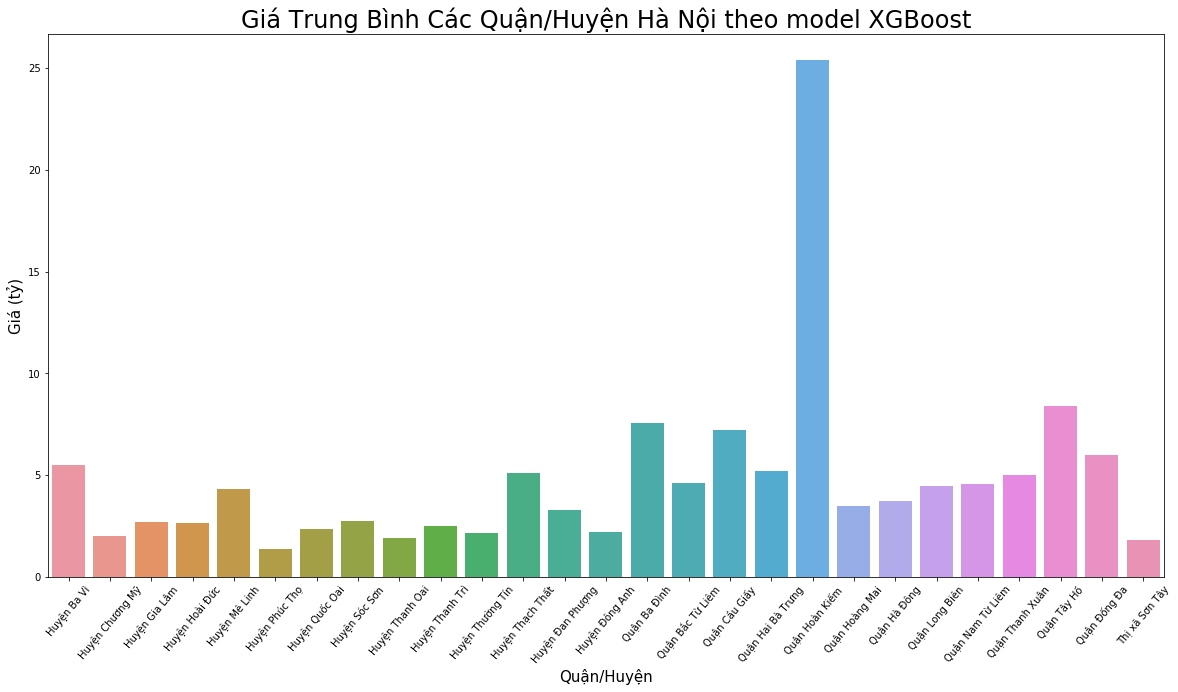

In [89]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
# Add title
plt.title("Giá Trung Bình Các Quận/Huyện Hà Nội theo model XGBoost", fontsize=24)

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=a.index, y=a["Gia"])

# Add label for vertical axis
plt.xlabel("Quận/Huyện", fontsize=15)
plt.ylabel("Giá (tỷ)", fontsize=15)

plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

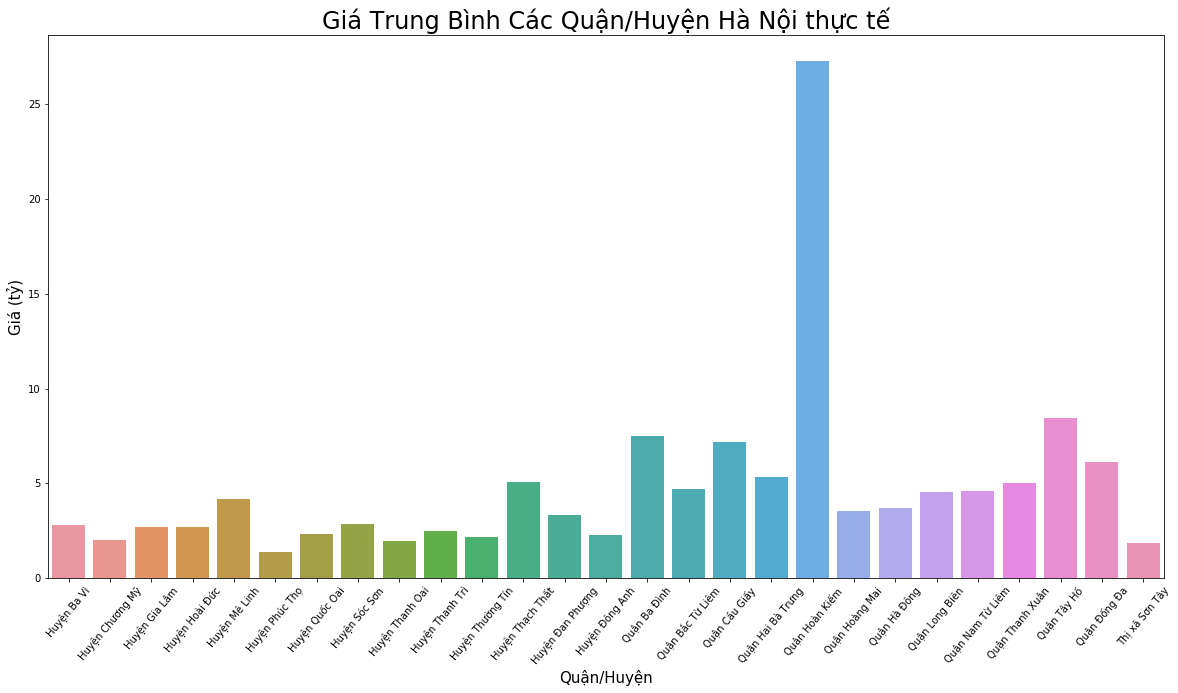

In [76]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
# Add title
plt.title("Giá Trung Bình Các Quận/Huyện Hà Nội thực tế", fontsize=24)

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=real.index, y=real["Gia"])

# Add label for vertical axis
plt.xlabel("Quận/Huyện", fontsize=15)
plt.ylabel("Giá (tỷ)", fontsize=15)

plt.xticks(rotation=50)

In [31]:
len(ensemble)

40682

In [332]:
for i, row in HN_copy.iterrows():
    row["Thang2"] = int(row["Thang"]) + 1
    row["Nam2"] = int(row["Nam"]) + 2019
    HN_copy.at[i,'Thang2'] = row['Thang2']
    HN_copy.at[i,'Nam2'] = row['Nam2']
HN_copy["Ngay2"] = 1

In [333]:
df2 = HN_copy[["Nam2", "Thang2", "Ngay2"]].copy()
df2.columns = ["year", "month", "day"]
HN_copy["date"] = pd.to_datetime(df2)

In [334]:
HN_dat = pd.DataFrame()
HN_dat["date"] = HN_copy["date"]
HN_dat["Actual"] = HN["Gia"]
HN_dat["XGB"] = final_predictions_xg
HN_dat["LGBM"] = final_predictions_lg
HN_dat["Ensemble"] = ensemble
HN_dat["Hedonic"] = final_predictions_li

In [335]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# HN_dat = HN_dat.set_index('date')
# # HN_dat['date'] = HN_dat['date'].values.astype(float)
# plt.figure(figsize=(14,7))
# sns.lineplot(data=HN_dat)

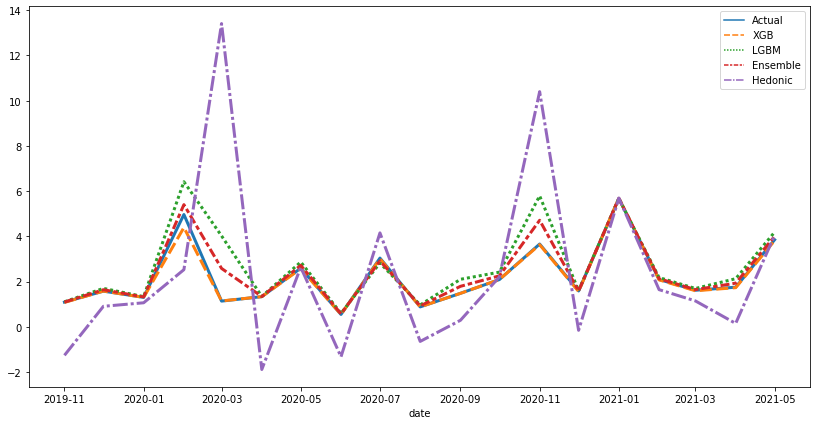

In [338]:
# Group data first by year, then by month
g = HN_dat.groupby(["date"])

# For each group, calculate the average of only the snow_depth column
monthly_averages = g.aggregate({np.mean})
plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_averages, linewidth = 3)